# Dask Array

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dask
import dask.array as da

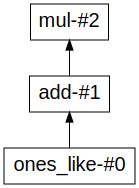

In [3]:
import dask.array as da

x = da.ones((10, 10), chunks=(5, 5))
x = x + 100
x = x * 100

x.dask.visualize(filename="img.svg")

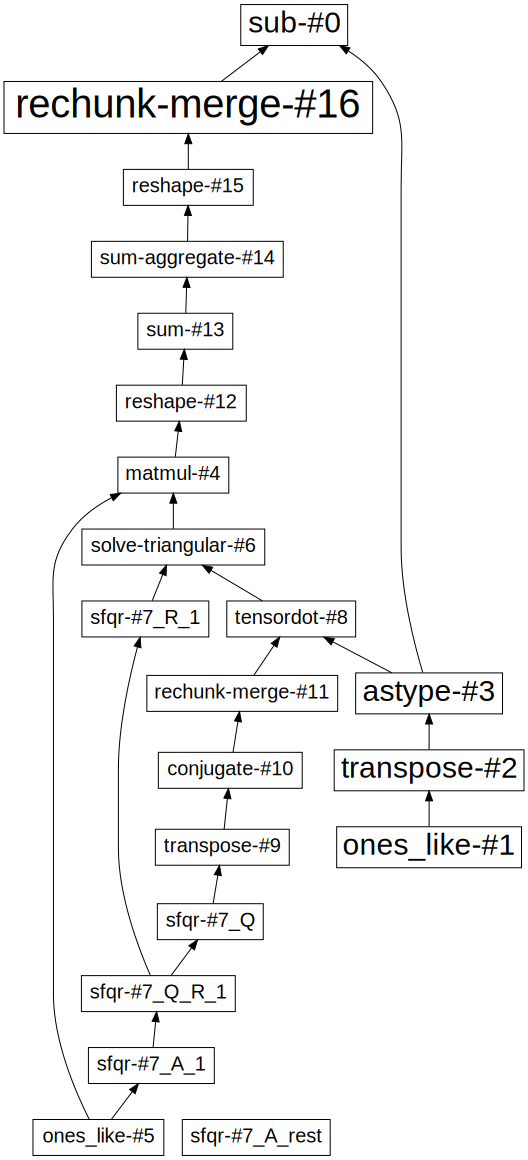

In [4]:
import dask.array as da

XL = da.ones((67552, 365941), chunks=(652, 5792))
XL2 = XL.T.astype("f4")
XC = da.ones((365941, 26), chunks=(365941, 26))
LS = da.linalg.lstsq(XC, XL2)[0]
XC_LS = XC @ LS
XLP = XL2 - XC_LS

XLP.dask.visualize()

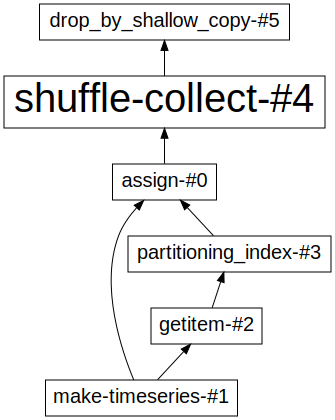

In [5]:
import dask.dataframe as dd

df = dd.demo.make_timeseries(
    start="2000",
    end="2015",
    dtypes={"A": float, "B": int},
    freq="5s",
    partition_freq="3M",
    seed=1234,
)
df = df.shuffle(1000)
# df = df.A.cumsum().resample("1w").mean()

df.dask.visualize()